In [36]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris['data'], columns= iris['feature_names'])
df = df_test.assign(target=pd.Series(iris['target']).values)

plt.figure()
parallel_coordinates(df, 'target')
plt.show()

print(df_test.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


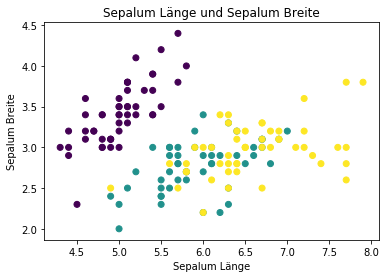

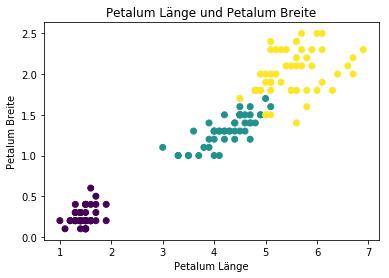

Prediction Accuracy:  1.0


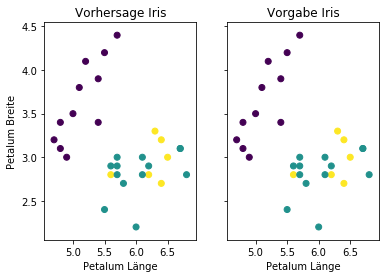

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


# Datensatz laden
iris = load_iris()

# Daten plotten
colors = list(iris['target'])

plt.scatter(iris['data'][:, 0], iris['data'][:, 1], c=colors)
plt.title("Sepalum Länge und Sepalum Breite")
plt.xlabel("Sepalum Länge")
plt.ylabel("Sepalum Breite")
plt.show()
 
plt.scatter(iris['data'][:, 2], iris['data'][:, 3], c=colors)
plt.title("Petalum Länge und Petalum Breite")
plt.xlabel("Petalum Länge")
plt.ylabel("Petalum Breite")
plt.show()


# Trainings- und Testdaten erzeugen

x_train, x_test, y_train, y_test = train_test_split(
                    np.array(iris['data']), 
                    np.array(iris['target']), 
                    test_size=0.2)


## kNN Algorithmus 
knn = KNeighborsClassifier(n_neighbors=5) 

knn.fit(x_train, y_train) 

pred = knn.predict(x_test)


### Funktion, die die Genauigkeit der Vorhersage berechnet 

def calculate_accuracy(pred, target): 
    counter = 0 
    for i in range(len(pred)): 
        if pred[i] == target[i]: 
            counter += 1 

    return counter / len(pred) 


def predict_one(k_neighbors, x_train, y_train, to_predict): 
    distances = [] 
    neighbors = [] 

    # alle Abstände holen als (index, Vektor) speichern 
    for i in range(len(x_train)): 
        dst = np.linalg.norm(x_train[i] - to_predict) 
        distances.append((i, dst)) 

    # liste nach Abstand sortieren 
    distances.sort(key=lambda tup: tup[1]) 

    # k Nachbarn holen 
    for i in range(k_neighbors): 
        neighbors.append(y_train[distances[i][0]]) 

    # Ausgabe ist am meisten vorkommender Element 
    return max(set(neighbors), key=neighbors.count)

def kNN(k_neighbors, x_train, y_train, x_test): 
    predictions = [] 
    for vec in x_test: 
        predictions.append(predict_one(k_neighbors, x_train, y_train, vec)) 

    return predictions

pred = kNN(5, x_train, y_train, x_test)


print("Prediction Accuracy: ", calculate_accuracy(pred, y_test))

#Vergleich von Vorhersage und Vorgabe
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True)
ax1.scatter(x_test[:, 0], x_test[:, 1], c=pred)
ax1.set(title='Vorhersage Iris', ylabel='Petalum Breite', xlabel='Petalum Länge')

ax2.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
ax2.set(title='Vorgabe Iris', xlabel='Petalum Länge')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.show()

